In [1]:
import cv2
import numpy as np
import pandas as pd
from pickle import load,dump
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk.translate.meteor_score import meteor_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import nltk.translate.gleu_score as gleu
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
import warnings
warnings.filterwarnings("ignore")

# KPATOUKPA Kpodjro , CONDE Alama, ABDOULAHI SALAHANNE Ahmed

**Data Cleaning**

In [2]:
with open('dataset/Description_finale.txt', 'r',encoding='utf-8') as f:
    captions = f.readlines()
captions = [caption.strip() for caption in captions]

datapath = "databases/labequip"
imagesl =[]
print("adding to train data")
    
imagesl = []
for i in range(len(captions)):
    dst = f"dataset/labequip/images_{str(i)}.jpg"
    imagesl.append(dst)        
print(len(imagesl),len(captions))

adding to train data
292 292


In [3]:
x = []
y = []
for idImg,line in zip(imagesl,captions) :
    txt = line.split(",")
    for i in range(len(txt)):
        x.append(idImg)
        y.append(txt[i])

In [4]:
len(x),len(y)

(654, 654)

In [5]:
dt = {'idImage':x,'description':y}
df = pd.DataFrame(dt)

In [6]:
uni_filenames = np.unique(df.idImage.values)

df.head()


,idImage,description
0,dataset/labequip/images_0.jpg,شخص يضع مواد في الأوتوكلاف
1,dataset/labequip/images_0.jpg,شخص يضع المواد في الأوتوكلاف
2,dataset/labequip/images_0.jpg,مواد تحميل فردية في الأوتوكلاف
3,dataset/labequip/images_1.jpg,الأوتوكلاف مغلقة
4,dataset/labequip/images_1.jpg,جهاز تعقيم مغلق


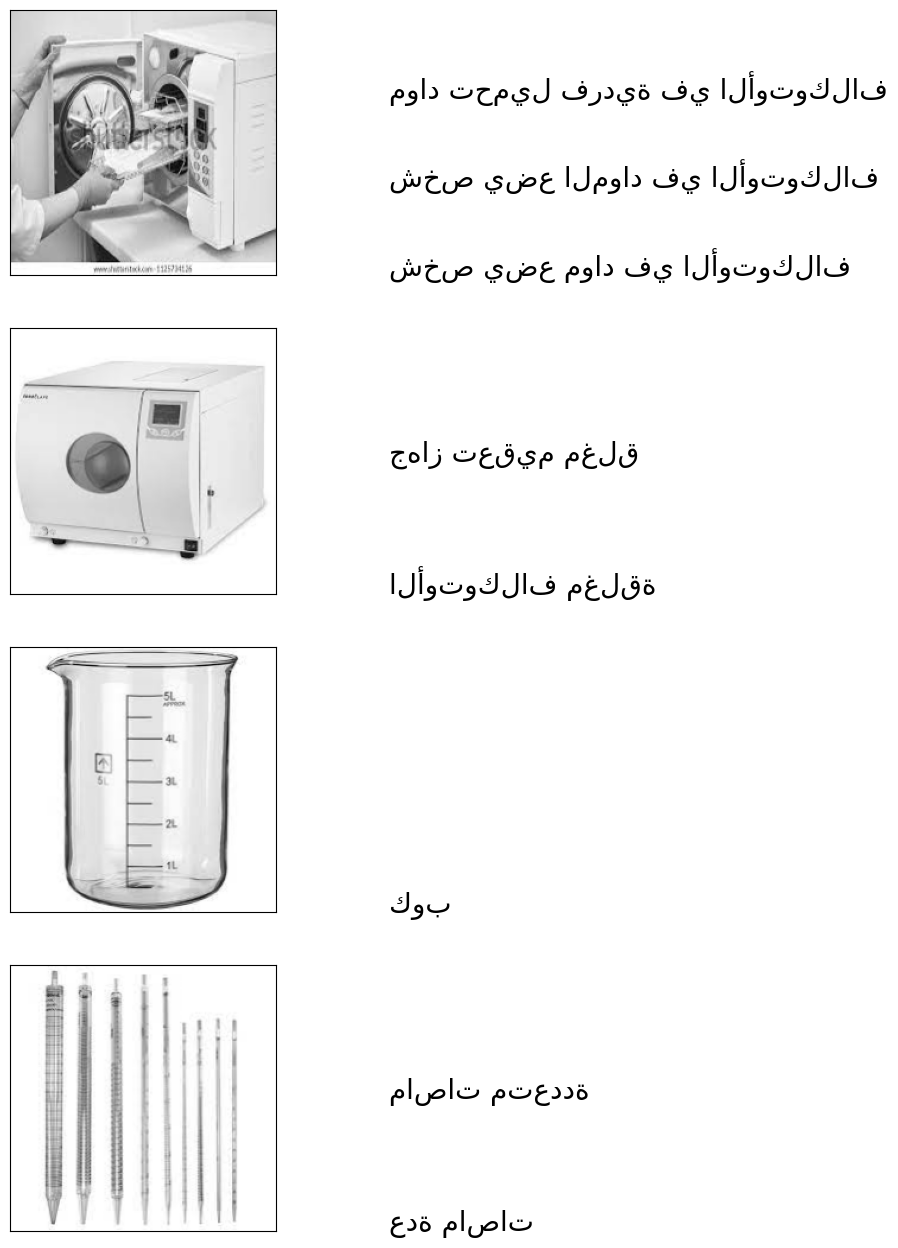

In [7]:
npic = 5
npix = 224
target_size = (npix,npix)
count = 1

fig = plt.figure(figsize=(10,20))
for jpgfnm in uni_filenames[0:4]:
    filename = jpgfnm
    captions = list(df["description"].loc[df["idImage"]==jpgfnm].values)
    image_load = cv2.resize(cv2.imread(filename,0), target_size) # load_img(filename, target_size=target_size)
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(cv2.cvtColor(image_load, cv2.COLOR_BGR2RGB))
    count += 1

    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=20)
    count += 1
plt.show()

In [8]:
vocabulary = []
for txt in df.description.values:
    vocabulary.extend(txt.split())
print('Vocabulary Size: %d' % len(set(vocabulary)))

Vocabulary Size: 280


# suppression de la ponctuation, des caractères isolés et 
# des valeurs numériques

In [9]:
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(string.punctuation)
    return(text_no_punctuation)

def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)

def remove_numeric(text):
    text_no_numeric = ""
    for word in text.split():
        isalpha = word.isalpha()
        if isalpha:
            text_no_numeric += " " + word
    return(text_no_numeric)

def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_single_character(text)
    text = remove_numeric(text)
    return(text)

for i, caption in enumerate(df.description.values):
    newcaption = text_clean(caption)
    df["description"].iloc[i] = newcaption

In [10]:
df.head(20)

,idImage,description
0,dataset/labequip/images_0.jpg,شخص يضع مواد في الأوتوكلاف
1,dataset/labequip/images_0.jpg,شخص يضع المواد في الأوتوكلاف
2,dataset/labequip/images_0.jpg,مواد تحميل فردية في الأوتوكلاف
3,dataset/labequip/images_1.jpg,الأوتوكلاف مغلقة
4,dataset/labequip/images_1.jpg,جهاز تعقيم مغلق
5,dataset/labequip/images_2.jpg,فتح الأوتوكلاف
6,dataset/labequip/images_2.jpg,جهاز تعقيم مفتوح
7,dataset/labequip/images_3.jpg,شخص ينظر إلى الأوتوكلاف المفتوحة
8,dataset/labequip/images_3.jpg,شخص يراقب الأوتوكلاف المفتوح
9,dataset/labequip/images_4.jpg,شخص يضع مواد في الأوتوكلاف


In [14]:
df.to_csv("dataset/ImagesTitrerAr.csv",index=False)

In [43]:
df = pd.read_csv("dataset/ImagesTitrerAr.csv")
df.dropna(inplace=True)
#df.drop_duplicates(inplace=True)

In [11]:
df.shape

(654, 2)

In [32]:
#from sklearn.preprocessing import FunctionTransformer


In [12]:
def img_augmentation(img):
    kernel = np.ones((3,3),np.uint8)
    kernel2D = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    h, w = img.shape
    center = (w // 2, h // 2)
    M05a = cv2.getRotationMatrix2D(center, 15, 1.0)
    
    img_erode = cv2.erode(img, kernel)
    img_blur = cv2.GaussianBlur(img_erode,(3,3),0)
    img_closing = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel2D)
    img_rot5a = cv2.warpAffine(img, M05a, (w, h), borderValue=(255,255,255))    
    return [img, img_blur, img_closing, img_rot5a]

In [13]:

# Define the BoW function
def BoW(gray):
    
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Convert descriptors to text
    text = [' '.join(map(str, d)) for d in descriptors]

    # Vectorize the text with BoW
    vectorizer = CountVectorizer() #vocabulary=list(set(vocabulary)))
    X = vectorizer.fit_transform(text)
    # Train a Naive Bayes classifier
    clf = MultinomialNB()
    clf.fit(X, text)

    # Compute the probability of each word given the image
    word_probs = []
    for i, word in enumerate(vectorizer.get_feature_names_out()):
        word_vec = np.zeros((1, len(vectorizer.vocabulary_)))
        word_vec[0, i] = 1
        word_prob = clf.predict_proba(word_vec)[:, 1]
        word_probs.append((word, word_prob))

    # Select the words with the highest probability
    caption_words = [word for word, prob in sorted(word_probs, key=lambda x: x[1], reverse=True)[:100]]

    # Convert the words to a caption
    caption = ' '.join(caption_words)

    return caption

In [14]:

def extract_features(images):
    # Resize all images to a fixed size
    resized_images = [cv2.imread(img,0) for img in images]

    # Convert images to grayscale
    features = [] # [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in resized_images]
    for img2 in resized_images :
        for img in img_augmentation(img2) :
            caption = BoW(img)     # Appel à la méthode BOW
            features.append(np.asarray(caption.split(), dtype=float))

    return features

In [15]:
X,Y =train_test_split(df, test_size=0.065, random_state=42)

In [16]:
X

,idImage,description
554,dataset/labequip/images_253.jpg,عدة زجاجات
108,dataset/labequip/images_42.jpg,غطاء الدخان
536,dataset/labequip/images_247.jpg,عدة أكواب
578,dataset/labequip/images_262.jpg,المزامنة والقارورة
481,dataset/labequip/images_224.jpg,زجاجات تحتوي على سائل
...,...,...
71,dataset/labequip/images_28.jpg,موقد بنزن في اللهب
106,dataset/labequip/images_41.jpg,شخص يقع بالقرب من غطاء الدخان
270,dataset/labequip/images_121.jpg,شخص لديه نظارات السلامة
435,dataset/labequip/images_204.jpg,عدة أكواب مع سائل


In [17]:
Y

,idImage,description
333,dataset/labequip/images_156.jpg,طفل يحمل أنبوب
78,dataset/labequip/images_31.jpg,جهاز طرد مركزي مفتوح
503,dataset/labequip/images_234.jpg,الأنابيب والقفازات والمجهر
290,dataset/labequip/images_133.jpg,دورق وحقنة
360,dataset/labequip/images_169.jpg,شخص يستخدم المجهر
650,dataset/labequip/images_290.jpg,الشخص يحمل قارورة
55,dataset/labequip/images_22.jpg,موقد بنسن تحت دورق
69,dataset/labequip/images_27.jpg,يد تضيء موقد بنسن
155,dataset/labequip/images_62.jpg,طفل يرتدي قفازات
54,dataset/labequip/images_21.jpg,موقد بنسن مضاء


In [18]:
# Les données de training
X_train = X.idImage.values
y_train = X.description.values

In [19]:
# Les données de Test
X_test = Y.idImage.values
y_test = Y.description.values

In [20]:
features = extract_features(X_train)

In [21]:
y_train.shape

(611,)

In [22]:
captions_aug = []

for i in range(len(y_train)) :  # pour se conformer à l'augmentation des images 
    for j in range(4) :         # faite par la fonction img_augmentation
        captions_aug.append(y_train[i])

len(captions_aug)

2444

In [25]:
x = 9999
for i in range(len(features)):
    if features[i].shape[0] <100 :
        x=i
        features.pop(x)
        captions_aug.pop(x)


In [26]:
len(features)

2438

In [27]:
train = np.array(features)
y = np.array(captions_aug)
y=y.reshape(-1,1)
train.shape

(2438, 100)

In [28]:
scaler = Normalizer()

In [29]:
X_train = scaler.fit_transform(train)

In [30]:
clf = RandomForestClassifier(n_estimators=250)
clf.fit(X_train, y)

RandomForestClassifier(n_estimators=250)

In [32]:
#dump(clf, open('dataset/model_clf.pkl', 'wb'))

In [33]:
score =0.0

# generate image captions based on object names
for imgt,realcap in zip(X_test,y_test):
    ft_test = extract_features([imgt])
    caption_list = []
    score1 =0.0
    for img in ft_test:

        img =scaler.transform(img.reshape(1,-1))
        prediction = clf.predict(img.reshape(1,-1))
        
        caption_tokens = [t.lower() for t in word_tokenize(prediction[0])]
        caption = " ".join(caption_tokens)
        
        # calculate the BLEU score
        if len(caption) >0 :
            caption_list.append(caption)
            sc = round(gleu.sentence_gleu([realcap.split()], caption.split(), min_len=1, max_len=1) , 3)
            if sc >score1 :
                score1 = sc
      #print(f"BLEU score: {rouge_1_score:.3f}")
    print(caption_list)
    if score1 >0.5 :
        score1 =1.0
    elif score1<0.2 :
        score1 =0.0
    score += score1
    print(realcap,10*'*',score1)
    

print(30 * '**')


['طفل وأنبوب', 'طفل وأنبوب', 'طفل وأنبوب', 'طفل وأنبوب']
 طفل يحمل أنبوب ********** 0.333
['جهاز طرد مركزي مفتوح', 'جهاز طرد مركزي مفتوح', 'جهاز طرد مركزي مفتوح', 'جهاز طرد مركزي مفتوح']
 جهاز طرد مركزي مفتوح ********** 1.0
['الأشخاص الذين لديهم نظارات وقفازات آمنة', 'الأشخاص الذين لديهم نظارات وقفازات آمنة', 'يستخدم العلماء في المجهر والأنابيب', 'يستخدم العلماء في المجهر والأنابيب']
 الأنابيب والقفازات والمجهر ********** 0.0
['حقنة في دورق', 'حقنة في دورق', 'حقنة في دورق', 'حقنة في دورق']
 دورق وحقنة ********** 0.333
['شخص يستخدم المجهر', 'شخص يستخدم المجهر', 'شخص يستخدم المجهر', 'شخص يستخدم المجهر']
 شخص يستخدم المجهر ********** 1.0
['شخص ما يحمل قارورة', 'شخص ما يحمل قارورة', 'شخص ما يحمل قارورة', 'شخص ما يحمل قارورة']
 الشخص يحمل قارورة ********** 0.5
['دورق موضوع فوق موقد بنسن', 'دورق موضوع فوق موقد بنسن', 'دورق موضوع فوق موقد بنسن', 'دورق موضوع فوق موقد بنسن']
 موقد بنسن تحت دورق ********** 1.0
['يد تضيء موقد بنسن', 'يد تضيء موقد بنسن', 'يد تضيء موقد بنسن', 'يد تضيء موقد بنسن']
 

In [34]:
score/len(y_test)

0.4786511627906975

In [35]:
estimators = [
      #('dt', DecisionTreeClassifier(max_depth=20, random_state=0)),
      ('rfc', RandomForestClassifier(n_estimators=100, random_state=0)),
       ('extraC',ExtraTreesClassifier(n_estimators=100, random_state=0))
       ]

In [36]:
clf = StackingClassifier(
     estimators=estimators,
     final_estimator=RandomForestClassifier(n_estimators=200, random_state=0)
 )
clf.fit(X_train, y)

StackingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=0)),
                               ('extraC',
                                ExtraTreesClassifier(random_state=0))],
                   final_estimator=RandomForestClassifier(n_estimators=200,
                                                          random_state=0))

DecisionTreeClassifier(max_depth=20, random_state=0)

In [37]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')

score =0.0
# generate image captions based on object names
for imgt,realcap in zip(X_test,y_test):
    ft_test = extract_features([imgt])
    caption_list = []
    score1 =0.0
    for img in ft_test:

        img =scaler.transform(img.reshape(1,-1))
        prediction = clf.predict(img.reshape(1,-1))
        caption_tokens = [t.lower() for t in word_tokenize(prediction[0])]
        caption = " ".join(caption_tokens)
        # calculate the BLEU score
        if len(caption) >0 :
            caption_list.append(caption)
            #sc = meteor_score([realcap.split()], caption.split())
            sc = round(gleu.sentence_gleu([realcap.split()], caption.split(), min_len=1, max_len=1) , 4)
            if sc>score1 :
                score1 = sc
      #print(f"BLEU score: {rouge_1_score:.3f}")
    print(caption_list)
    if score1 >0.66 :
        score1 =1.0
    elif score1<0.2 :
        score1 =0.0
    score += score1
    print(realcap,10*'*',score1)
    

print(30 * '**')


['شخص ما يحمل طبق ساخن', 'شخص ما يحمل طبق ساخن', 'شخص ما يحمل طبق ساخن', 'ثلاجة تحتوي على ماصات متعددة']
 طفل يحمل أنبوب ********** 0.2
['جهاز طرد مركزي مفتوح', 'جهاز طرد مركزي مفتوح', 'جهاز طرد مركزي مفتوح', 'جهاز طرد مركزي مفتوح']
 جهاز طرد مركزي مفتوح ********** 1.0
['الأشخاص الذين لديهم نظارات وقفازات آمنة', 'الأشخاص الذين لديهم نظارات وقفازات آمنة', 'الأشخاص الذين لديهم نظارات وقفازات آمنة', 'الأشخاص الذين لديهم نظارات وقفازات آمنة']
 الأنابيب والقفازات والمجهر ********** 0.0
['عدة محاقن', 'عدة محاقن', 'عدة محاقن', 'عدة محاقن']
 دورق وحقنة ********** 0.0
['شخص يستخدم المجهر', 'شخص يستخدم المجهر', 'شخص يستخدم المجهر', 'شخص يستخدم المجهر']
 شخص يستخدم المجهر ********** 1.0
['يحمل الشخص أنابيب تحتوي على سائل', 'شخص ما يحمل أنابيب مع سائل', 'يحمل الشخص أنابيب تحتوي على سائل', 'يحمل الشخص أنابيب تحتوي على سائل']
 الشخص يحمل قارورة ********** 0.3333
['يستخدم الشخص المجهر', 'يستخدم الشخص المجهر', 'يستخدم الشخص المجهر', 'يستخدم الشخص المجهر']
 موقد بنسن تحت دورق ********** 0.0
['يد تضيء م

In [39]:
score/len(y_test)

0.4116255813953489

In [54]:
clf = ExtraTreesClassifier(n_estimators=100) 
clf.fit(X_train, y)

ExtraTreesClassifier()

In [55]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')

score =0.0
# generate image captions based on object names
for imgt,realcap in zip(X_test,y_test):
    ft_test = extract_features([imgt])
    caption_list = []
    score1 =0.0
    for img in ft_test:

        img =scaler.transform(img.reshape(1,-1))
        prediction = clf.predict(img.reshape(1,-1))
        caption_tokens = [t.lower() for t in word_tokenize(prediction[0])]
        caption = " ".join(caption_tokens)
        # calculate the BLEU score
        if len(caption) >0 :
            caption_list.append(caption)
            #sc = meteor_score([realcap.split()], caption.split())
            sc = round(gleu.sentence_gleu([realcap.split()], caption.split(), min_len=1, max_len=1) , 4)
            if sc>score1 :
                score1 = sc
      #print(f"BLEU score: {rouge_1_score:.3f}")
    print(caption_list)
    if score1 >0.66 :
        score1 =1.0
    elif score1<0.2 :
        score1 =0.0
    score += score1
    print(realcap,10*'*',score1)
    

print(30 * '**')

['طفل وأنبوب', 'طفل وأنبوب', 'طفل وأنبوب', 'طفل وأنبوب']
 طفل يحمل أنبوب ********** 0.3333
['جهاز طرد مركزي مفتوح', 'جهاز طرد مركزي مفتوح', 'جهاز طرد مركزي مفتوح', 'جهاز طرد مركزي مفتوح']
 جهاز طرد مركزي مفتوح ********** 1.0
['الأشخاص الذين لديهم نظارات وقفازات آمنة', 'الأشخاص الذين لديهم نظارات وقفازات آمنة', 'الأشخاص الذين لديهم نظارات وقفازات آمنة', 'الأشخاص الذين لديهم نظارات وقفازات آمنة']
 الأنابيب والقفازات والمجهر ********** 0.0
['حقنة في دورق', 'حقنة في دورق', 'حقنة في دورق', 'حقنة في دورق']
 دورق وحقنة ********** 0.3333
['شخص يستخدم المجهر', 'شخص يستخدم المجهر', 'شخص يستخدم المجهر', 'شخص يستخدم المجهر']
 شخص يستخدم المجهر ********** 1.0
['شخص ما يحمل قارورة', 'شخص ما يحمل قارورة', 'شخص ما يحمل قارورة', 'شخص ما يحمل قارورة']
 الشخص يحمل قارورة ********** 0.5
['دورق موضوع فوق موقد بنسن', 'دورق موضوع فوق موقد بنسن', 'دورق موضوع فوق موقد بنسن', 'دورق موضوع فوق موقد بنسن']
 موقد بنسن تحت دورق ********** 0.6
['يد تضيء موقد بنسن', 'يد تضيء موقد بنسن', 'يد تضيء موقد بنسن', 'يد تضيء م

In [56]:
score/len(y_test)

0.41032325581395346

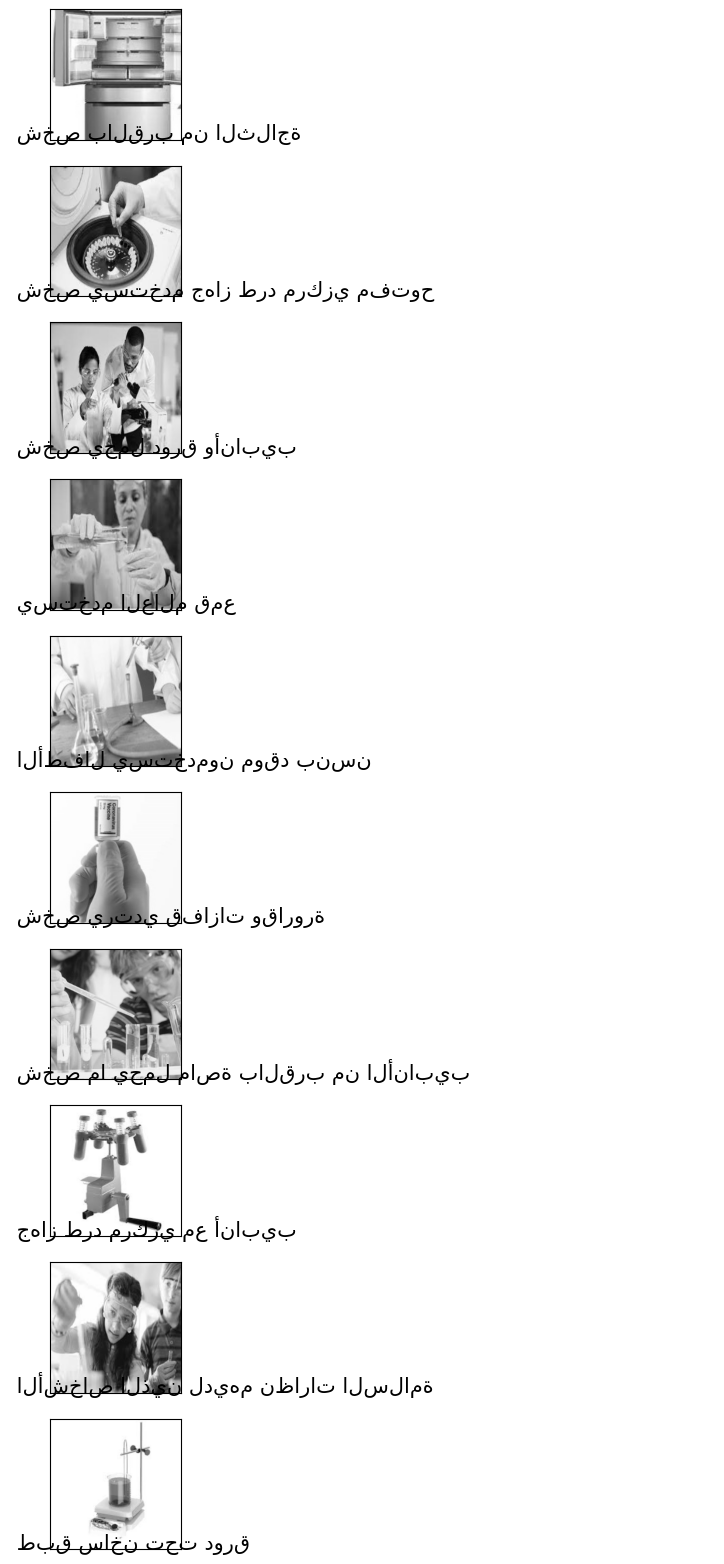

In [40]:
npic = 10
npix = 224
target_size = (npix,npix)
count = 1
i,j=10,10
fig = plt.figure(figsize=(10,20))
for img,cap in zip(X_test[i:i+10],y_test[j:j+10] ):
    filename = img
    #captions = list(df["description"].loc[df["idImage"]==jpgfnm].values)
    image_load = cv2.resize(cv2.imread(filename,0), target_size) # load_img(filename, target_size=target_size)
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(cv2.cvtColor(image_load, cv2.COLOR_BGR2RGB))
    count += 1

    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(df.description))
    #for i, caption in enumerate(captions):
    ax.text(-1,1,cap,fontsize=15)
    count += 1
plt.show()

In [41]:

captions = [ cap for cap in df.description.values]
len(captions)

654

In [42]:
mx =0
for cap in captions :
    k = len(cap.split())
    if k > mx :
        mx =k
        
mx

8

In [43]:
def word_count(captions):
    counts = dict()
    
    for cap in captions :
        words = cap.split()

        for word in words:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1

    return counts

listofwords = word_count(captions)
list1 = [ elt for elt in listofwords.keys()]
len(list1)

273

In [44]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [45]:
le.fit(list1)

LabelEncoder()

In [76]:
le.transform(['near','an','open','refrigerator'])

array([ 84,   4,  90, 113])

In [46]:
tableau = np.full((len(captions_aug),mx),-1)

for i, cap in zip(range(len(captions_aug)), captions_aug) :
    cap1 = cap.split()
    kkk = le.transform(cap1)
    k=len(cap1)
    tableau[i,0:k]=kkk

In [47]:
tableau.shape

(2438, 8)

In [48]:
vect = CountVectorizer()
vect.fit(captions)
y1 = vect.transform(captions_aug)
y1.shape

(2438, 272)

In [57]:
svm1 = MLPClassifier(hidden_layer_sizes=(100,90),
                          alpha=0.01,
                          random_state=1,
                          max_iter=500)
svm_model= MultiOutputClassifier(svm1)

svm_model.fit(X_train, tableau)

MultiOutputClassifier(estimator=MLPClassifier(alpha=0.01,
                                              hidden_layer_sizes=(100, 90),
                                              max_iter=500, random_state=1))

In [58]:
# generate image captions based on object names
score =0.0
for imgt,realcap in zip(X_test,y_test):
    ft_test = extract_features([imgt])
    caption_list = []
    score1 =0.0
    for img in ft_test:

        img =scaler.transform(img.reshape(1,-1))
        prediction = svm_model.predict(img.reshape(1,-1))
        prediction=np.array(prediction, dtype=int)
        prediction= np.ravel(prediction)
        prediction = np.delete(prediction, np.where(prediction == -1))
        caption = le.inverse_transform(prediction)
        caption  = " ".join(caption)
        if len(caption) >0 :
            caption_list.append(caption)
            #sc = meteor_score([realcap.split()], caption.split())
            sc = round(gleu.sentence_gleu([realcap.split()], caption.split(), min_len=1, max_len=1) , 4)
            if sc>score1 :
                score1 = sc
      #print(f"BLEU score: {rouge_1_score:.3f}")
    print(caption_list)
    if score1 >0.66 :
        score1 =1.0
    elif score1<0.2 :
        score1 =0.0
    score += score1
    print(realcap,10*'*',score1)
        

['عدة وأنبوب', 'عدة بجانب يستخدم', 'طفل مع', 'شخص لديه']
 طفل يحمل أنبوب ********** 0.3333
['شخص بجانب القفازات', 'شخص يحمل', 'شخص طرد مركزي', 'قمع وأنبوب']
 جهاز طرد مركزي مفتوح ********** 0.5
['شخص العلماء والأنابيب', 'شخص بالقرب من', 'شخص يحمل في وقفازات', 'شخص يضع']
 الأنابيب والقفازات والمجهر ********** 0.0
['زجاجة وكوب', 'حقنة متعددة', 'شخص وأنبوب القوارير', 'شخص الذين']
 دورق وحقنة ********** 0.0
['شخص حرارة إلى', 'شخص مفتوحة المجهر', 'شخص ما المجهر', 'شخص']
 شخص يستخدم المجهر ********** 1.0
['شخص الناس يحمل', 'شخص ومقياس', 'شخص أنابيب مركزي', 'شخص لديه يحمل']
 الشخص يحمل قارورة ********** 0.3333
['عدة أنابيب', 'قمع موضوع', 'شخص موضوع موقد بنسن', 'شخص أكواب']
 موقد بنسن تحت دورق ********** 0.5
['خباز بنزن مع', 'طفل بجانب نظارات', 'شخص وكوب من', 'الشخص متعددة مع']
 يد تضيء موقد بنسن ********** 0.0
['شخص متعددة', 'شخص ما', 'شخص يضع', 'شخص ينظر']
 طفل يرتدي قفازات ********** 0.0
['أنبوب بنزن بنسن', 'موقد موقد', 'قمع موقد بنسن', 'ثلاجة في']
 موقد بنسن مضاء ********** 1.0
['قمع مع', 

In [59]:
score/len(y_test)

0.2524046511627907

In [108]:
y2 = [83., 51. , 0.,  0. , 0. , 0. , 0. , 0.]
y3 = np.array(y2, dtype=int)
y3

array([83, 51,  0,  0,  0,  0,  0,  0])

In [52]:
## Read and convert 
img = cv2.imread("dataset/labequip/images_186.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

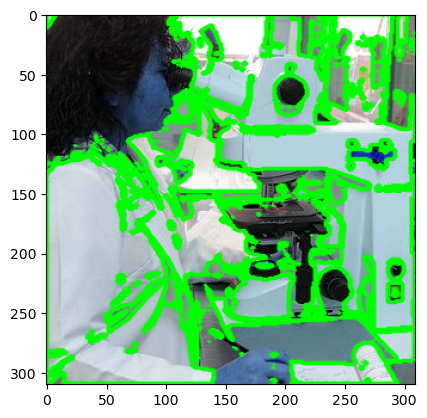

In [53]:
ret, thresh1 = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

contours6, hierarchy6 = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
image_copy7 = img.copy()
cv2.drawContours(image_copy7, contours6, -1, (0, 255, 0), 2, cv2.LINE_AA)
plt.figure()
plt.imshow(image_copy7)

In [107]:
df = pd.read_csv("dataset/ImagesTitrerAr.csv")
df.dropna(inplace=True)

features = extract_features(df.idImage.values)

In [108]:
len(features)

3912

In [109]:
captions = df.description.values

labels = []

for i in range(len(captions)) :
    for j in range(6) : 
        labels.append(captions[i])

len(labels)

3912

In [112]:
x = 9999
for i in range(len(features)):
    if features[i].shape[0] <100 :
        x=i
        features.pop(x)
        labels.pop(x)

In [113]:
len(labels), len(features)

(3907, 3907)

In [124]:
# save to deploiement file
dump(labels, open('dataset/deploiement_captions.pkl', 'wb'))
dump(features, open('dataset/deploiement_features.pkl', 'wb'))

In [125]:
y = load(open('dataset/deploiement_captions.pkl', 'rb'))
features = load(open('dataset/deploiement_features.pkl', 'rb'))

In [126]:
train = np.array(features)
y = np.array(labels)
y=y.reshape(-1,1)
train.shape

(3907, 100)

In [127]:
scaler = Normalizer()
X_train = scaler.fit_transform(train)

In [128]:
X_train.shape, y.shape

((3907, 100), (3907, 1))

In [129]:
clf = RandomForestClassifier(n_estimators=250)
clf.fit(X_train, y)

RandomForestClassifier(n_estimators=250)

In [130]:
dump(clf, open('C:/Users/Kpodjro/MyFlask/model_clf.pkl', 'wb'))